R-squared value on prediction data: 0.7999694122666615


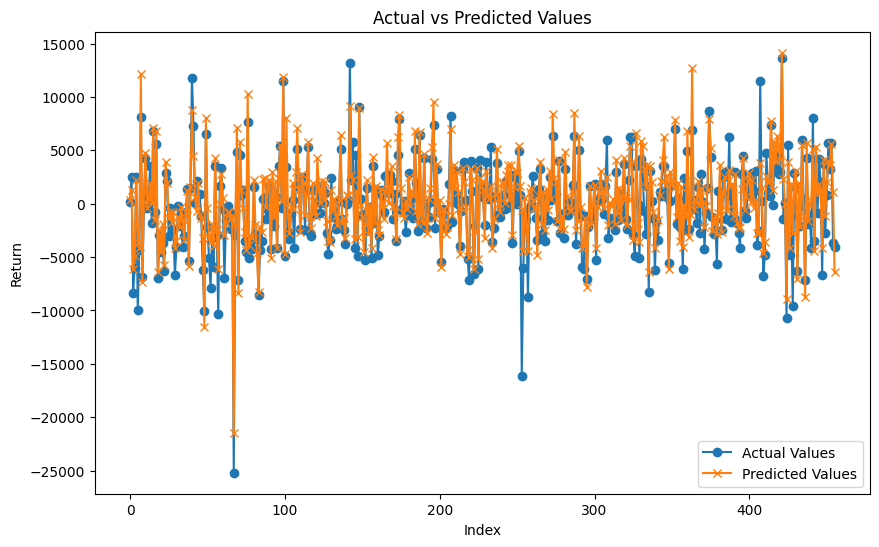

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
file_path = 'data/bsmax_0_1.csv'
data = pd.read_csv(file_path, sep='\t')

# Split the data into 80% for training and 20% for prediction
split_index = int(len(data) * 0.8)
train_data = data[:split_index]
predict_data = data[split_index:]

# Separate features and target variable for training data
X_train = train_data.drop('rtn', axis=1)
y_train = train_data['rtn']

# Normalize the features for training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Separate features and target variable for prediction data
X_predict = predict_data.drop('rtn', axis=1)
y_actual = predict_data['rtn']

# Normalize the features for prediction data
X_predict_scaled = scaler.transform(X_predict)

# Predict on the prediction set
y_pred = model.predict(X_predict_scaled)

# Evaluate the model on the prediction set
r2 = r2_score(y_actual, y_pred)
print(f'R-squared value on prediction data: {r2}')

# Visual comparison
plt.figure(figsize=(10, 6))
plt.plot(y_actual.values, label='Actual Values', marker='o')
plt.plot(y_pred, label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Return')
plt.legend()
plt.show()


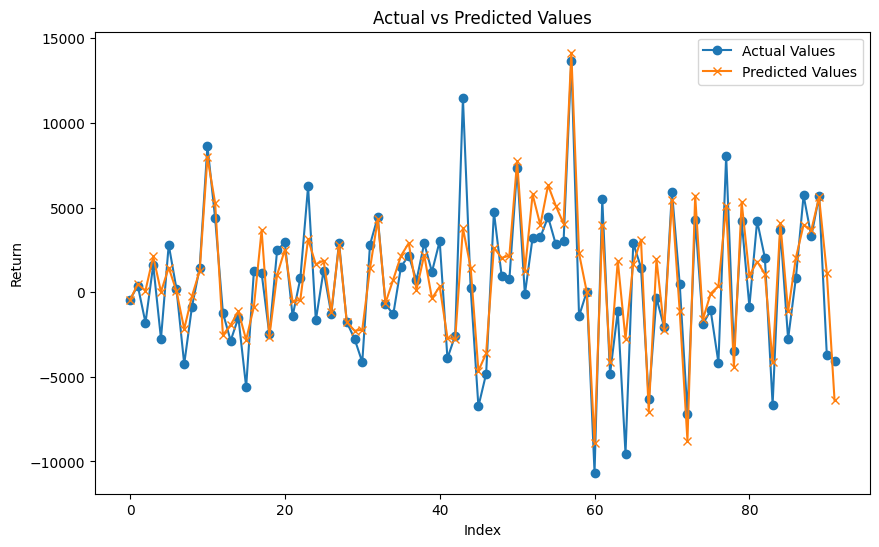

In [8]:
# Visual comparison
plt.figure(figsize=(10, 6))
plt.plot(y_actual.values[int(y_actual.values.size*0.8):], label='Actual Values', marker='o')
plt.plot(y_pred[int(len(y_actual.values)*0.8):], label='Predicted Values', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Return')
plt.legend()
plt.show()